#  Image segmentaion using K-means Clustering

In [1]:
import numpy as np

import cv2
import matplotlib.pyplot as plt

## Building our model

In [2]:
img=cv2.imread("./10dec21sor16mplot6.png") # by default cv2 store the image into BGR
# convert BGR to RGB
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

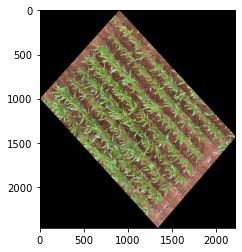

In [3]:
plt.imshow(rgb_img)

In [4]:
rgb_img.shape

(2463, 2212, 3)

# K-Means Clustering


In [7]:
from sklearn.cluster import KMeans

In [50]:
# Convert MxNx3 image into Kx3 where K=MxN
#Reshaping the image into a 2D array of pixels and 3 color values (RGB)
img2 = rgb_img.reshape((-1,3))  
print(img2.shape)

(5448156, 3)


In [111]:
dominant_colors = 2

km = KMeans(n_clusters=dominant_colors)


km.fit(img2)

KMeans(n_clusters=2)

In [112]:
results = np.array([km.labels_]).reshape(-1,1)

In [113]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
centers = km.cluster_centers_
print(centers) # In RGB Format

[[  4.96822933   3.12972037   1.67449062]
 [137.14418767 128.12716461  85.96130969]]


In [115]:
# Convert to Integer format
centers = np.array(centers,dtype='uint8')

In [116]:
print(centers)

[[  4   3   1]
 [137 128  85]]


## Plot what all colors are these??

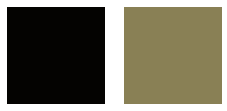

In [117]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

# Segmenting our original image


In [118]:
new_img = np.zeros((rgb_img.shape[0]*rgb_img.shape[1],3),dtype='uint8')
print(new_img.shape)

(5448156, 3)


In [119]:
colors

[array([4, 3, 1], dtype=uint8), array([137, 128,  85], dtype=uint8)]

In [120]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

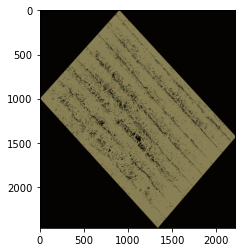

In [121]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((rgb_img.shape))
plt.imshow(new_img)
plt.show()

In [122]:
new_imgveg = np.zeros((rgb_img.shape[0]*rgb_img.shape[1],3),dtype='uint8')
new_imgvegmask = np.zeros((rgb_img.shape[0]*rgb_img.shape[1],3),dtype='uint8')
print(new_imgveg.shape)

(5448156, 3)


In [123]:
#if we check in color codes of labels assigned above then it is clear that
#first color is of vegetion and it has label  0
#count variable here is taken for debugging
count=0
for i in range(results.shape[0]):
    if(results[i][0]==1):
        #print(results[i][0])
        count=count+1
        new_imgveg[i,:]=img2[i,:]
        new_imgvegmask[i,:]=255
        
print(count)

2411691


In [124]:
vegetation = new_imgveg.reshape((img.shape))
vegetation.shape

(2463, 2212, 3)

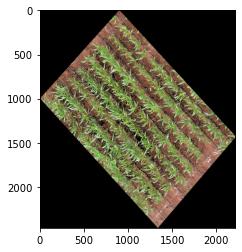

(2463, 2212, 3)

In [125]:
plt.imshow(vegetation)
plt.show()
vegetation.shape

In [126]:
cv2.imwrite('vegetation_image.tif',vegetation)

True

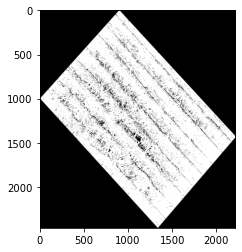

(2463, 2212, 3)

In [127]:
vegetationmask = new_imgvegmask.reshape((img.shape))
plt.imshow(vegetationmask)
plt.show()
vegetationmask.shape

In [128]:
# Saving the  Mask image......
cv2.imwrite('./Desktop/BioMass_predict/vegetationmask_imag_1.tif',vegetationmask)

False